## Data Analyst Practical Exam
### Product Sales Data Analysis

Biman S. Mondal\
Nov. 14, 2025

### Objective
Pens and Printers - Sales Dataset\
How many customers were there for each approach?\
What does the spread of the revenue look like overall? And for each method?\
Was there a difference in the revenue over time for each method?\
Based on the data, which method would recommend we continue to use? (some methods may take more time than the team so they may not be the best for us)
We don't know anything between the customers in each group. 

How should the business monitor what they want to achieve?\
Estimate the initial values for the metric vased on the current data?\
Final recommendation that the business should undertake?\

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Hide warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read data
df = pd.read_csv('product_sales.csv')

In [3]:
# Look at a few rows of the dataframe
print(df.head(2))
print('\n',df.shape)

   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   

   years_as_customer  nb_site_visits    state  
0                  0              24  Arizona  
1                  1              28   Kansas  

 (15000, 8)


In [4]:
# Find number of mising data
df.isna().sum()
# Revenue column has 1074 na values.
# No other column has na values

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [11]:
# Replace data with median
#df['revenue']=df['revenue'].fillna(np.mean(w_revenue['revenue']))
print(df['revenue'].isna().sum())

1074


In [5]:
# Column data types
print(df.dtypes)
# The object types need to be converted to categorical type

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object


In [6]:
# Descriptive statistics of a given column
df.week.describe()

count    15000.000000
mean         3.098267
std          1.656420
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: week, dtype: float64

In [9]:
# Number of unique customers
print('No unique values: ', df['customer_id'].nunique())
print("Duplicated id's:", df['customer_id'].duplicated().sum())
# Each row represents unique customer and there are no duplicates

No unique values:  15000
Duplicated id's: 0


In [10]:
# Replace invalid years as customer to nominal
# Company is 41 years old, there cannot be customers older than 41 years
df.loc[df['years_as_customer']>40,'years_as_customer']=5
df[df['years_as_customer']>40].count()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

### Assign Categorical Data Type

In [20]:
# Convert text type to categories
df['customer_id'] = df['customer_id'].astype('category')
df['state'] = df['state'].astype('category')
#print(df.dtypes)

# Check sales method column
print(df['sales_method'].unique())
# There are extra categories
# need to merge category 'em + call' to 'Email + Call' and "email" to "Email"
update_sales_categories = {
    'em + call': 'Email + Call',
    'email': 'Email'
}

# Replace extra categories to that's required
df['sales_method'] = df['sales_method'].replace(update_sales_categories)
df['sales_method'] = df['sales_method'].astype('category')

# Categories
print(df['sales_method'].cat.categories)
print(df['sales_method'].value_counts(normalize=True))


['Email', 'Email + Call', 'Call']
Categories (3, object): ['Call', 'Email', 'Email + Call']
Index(['Call', 'Email', 'Email + Call'], dtype='object')
sales_method
Email           0.497733
Call            0.330800
Email + Call    0.171467
Name: proportion, dtype: float64


### Sales Method Distribution

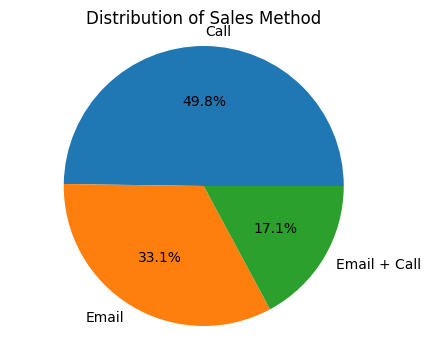

In [21]:
# Plot pie chart
fig, ax = plt.subplots(figsize=(5,4))
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#        autopct='%1.1f%%', shadow=True, startangle=140)
colors = sns.color_palette()[0:3]

labels = ['Call', 'Email', 'Email + Call']
#plt.pie(df['sales_method'].value_counts(normalize=True), colors=colors, labels=df['sales_method'].value_counts(normalize=True).index, autopct='%1.1f%%')
plt.pie(df['sales_method'].value_counts(normalize=True), colors=colors, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Sales Method")
plt.show()
fig.savefig("SalesMethod_Proportion_PieChart.png", dpi=70)

In [19]:
# Determine percentage of revenue by sales method
np.round(df.groupby('sales_method')['revenue'].sum()/df.groupby('sales_method')['revenue'].sum().sum(),3)
#df['sales_method'].value_counts(normalize=True).round(3)

sales_method
Call            0.174
Email           0.514
Email + Call    0.312
Name: revenue, dtype: float64

### Perform Regression by Sales Method

In [27]:
# Split dataframe with and without revenue
no_revenue = df[df['revenue'].isna()]
w_revenue = df[~df['revenue'].isna()]

#print(no_revenue.shape)
#fig, axs = plt.subplots(2,1, figsize=(6,4))
#axs[0].hist(w_revenue['nb_sold'], bins=20,rwidth=True)
#axs[1].hist(no_revenue['nb_sold'],bins=20)
#plt.show()

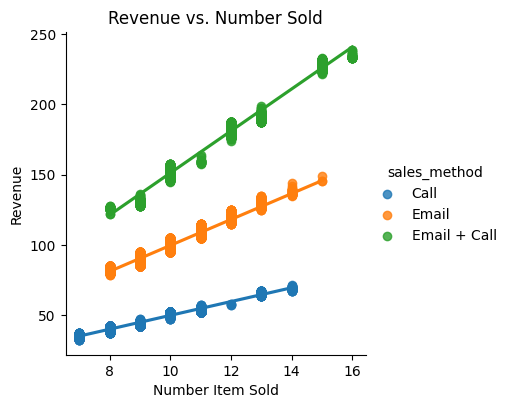

In [28]:
# Plot regression of revenue vs number sold by sales method
# Create regression plot by categorical data
g=sns.lmplot(x='nb_sold', y='revenue', data=w_revenue, hue='sales_method', height=4)
plt.title('Revenue vs. Number Sold')
plt.xlabel('Number Item Sold')
plt.ylabel('Revenue')

plt.show()
# Save the figure
g.savefig('regression_plot_revenue_vs_nb_sold.png', dpi=60)

In [30]:
# Use stats.linregress to get the parameters of the lines above
# Print slope and intercept of each curve
mydict=dict()

for method in w_revenue['sales_method'].unique():
    
    print('\nMethod:', method)
    foo=w_revenue.loc[w_revenue['sales_method']==method,['nb_sold','revenue']]
    slope, intercept, r_value, p_value, std_err = stats.linregress(foo['nb_sold'], foo['revenue'])
    
    # Print curve data 
    print(f"\tSlope: {slope}")
    print(f"\tIntercept: {intercept}")
    print(f"\tR-value: {r_value}")
    print(f"\tP-value: {p_value}")
    print(f"\tStandard Error: {std_err}")
    
    # Save dictionary
    mydict[method] = [slope, intercept]


Method: Email + Call
	Slope: 14.8992164387251
	Intercept: 2.079180143274101
	R-value: 0.9895907478970732
	P-value: 0.0
	Standard Error: 0.04597536262950867

Method: Call
	Slope: 4.899156900095705
	Intercept: 1.0508652938825946
	R-value: 0.9858796014324884
	P-value: 0.0
	Standard Error: 0.012037294540682279

Method: Email
	Slope: 9.197137648018783
	Intercept: 7.7033913428766
	R-value: 0.9678431333077852
	P-value: 0.0
	Standard Error: 0.0287360298712278


In [50]:
# Use the dictionary to apply the prediction of the revenue
#x,y = mydict['Email + Call']
#print(x, y)
def pred_rev(row):
    'Predict revenue for nan values given sales_method and number sold'
    x, b = mydict[row['sales_method']]
    return row['nb_sold']*x + b

# Assign prediction value to dataframe with revenue as NaN
no_revenue['pred_revenue'] = df.apply(pred_rev, axis=1)

df.loc[no_revenue.index,'revenue'] = no_revenue['pred_revenue']

C:\Users\AlexB\AppData\Local\Temp\ipykernel_61680\2809222552.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_revenue['pred_revenue'] = df.apply(pred_rev, axis=1)


In [19]:
# Verify no NaN values in dataframe
df[df['revenue'].isna()]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


### Regression Modeling

## Plot Data

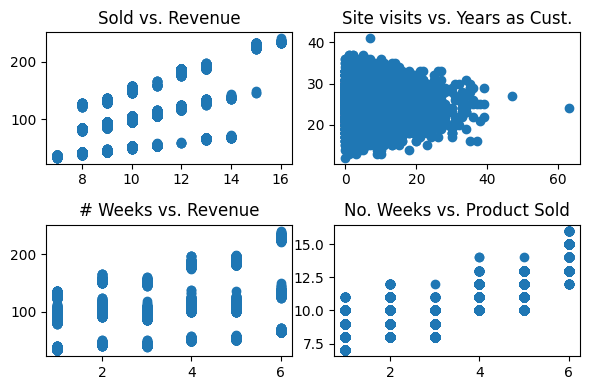

In [48]:

fig, axs = plt.subplots(2,2, figsize=(6,4))
axs[0,0].plot(df['nb_sold'], df['revenue'],'o')
axs[0,1].plot(df['years_as_customer'],df['nb_site_visits'],'o')
axs[1,0].plot(df['week'],df['revenue'],'o')
axs[1,1].plot(df['week'],df['nb_sold'],'o')
# Add titles
axs[0,0].set_title('Sold vs. Revenue')
axs[0,1].set_title('Site visits vs. Years as Cust.')
axs[1,0].set_title('# Weeks vs. Revenue')
axs[1,1].set_title('No. Weeks vs. Product Sold')

plt.tight_layout()
plt.show()


239302.17


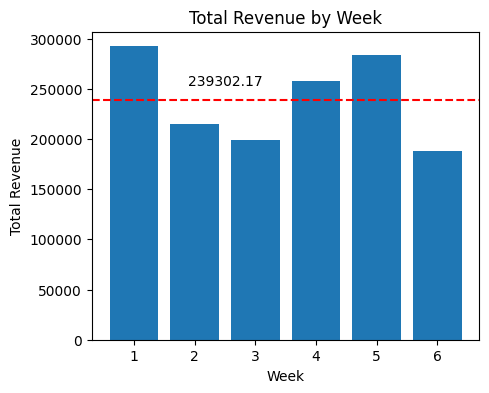

In [43]:
# Plot the weekly revenue for all weeks
fig, ax = plt.subplots(figsize=(5,4))
tot_revenue_week = df.groupby(by=['week'])['revenue'].sum().round()
# Calculate average revenue
avg_weekly_rev = np.round(np.mean(tot_revenue_week),2) 
print(avg_weekly_rev)
vals = plt.bar(x=tot_revenue_week.index, height=tot_revenue_week.values)

# Add a horizontal line representing average revenue
plt.axhline(y=avg_weekly_rev, color='r', linestyle='--', label='Threshold')

# Add value of average revenue to plot
plt.text(2.5, 250000, avg_weekly_rev,
        color='black',
        horizontalalignment='center',  # Align text horizontally to its center
        verticalalignment='bottom',    # Align text vertically to its bottom
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Week')
#plt.savefig("Total_Revenue_acrossWeeks.png", dpi=60)
plt.show()

sales_method
Call            0.164639
Email           0.505347
Email + Call    0.330014
Name: revenue, dtype: float64


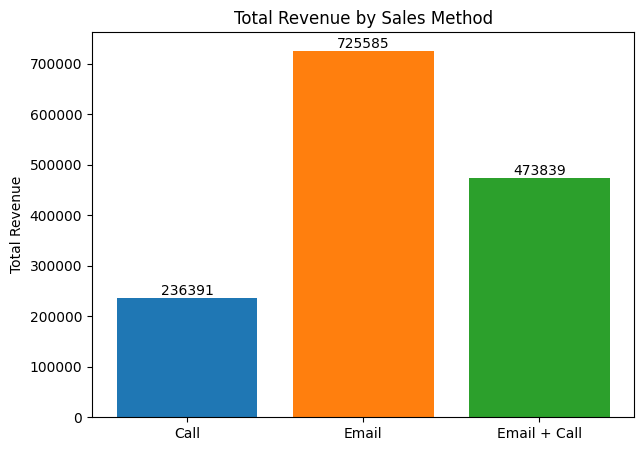

In [85]:
# Plot revenue by sales method
fig, ax = plt.subplots(figsize=(7,5))
rev_sum = df.groupby(by='sales_method')['revenue'].sum().round(0)
breakdown = rev_sum/rev_sum.sum()
print(breakdown)
vals = plt.bar(x=rev_sum.index, height=rev_sum.values, color=['tab:blue','tab:orange','tab:green'])
ax.bar_label(vals, label_type='edge', color='black',fontsize=10)
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Sales Method')
plt.show()
fig.savefig("Total_Revenue_bySales.png",dpi=60) 

rev_mean = df.groupby(by='sales_method')['revenue'].mean().round(0)
print(rev_mean)

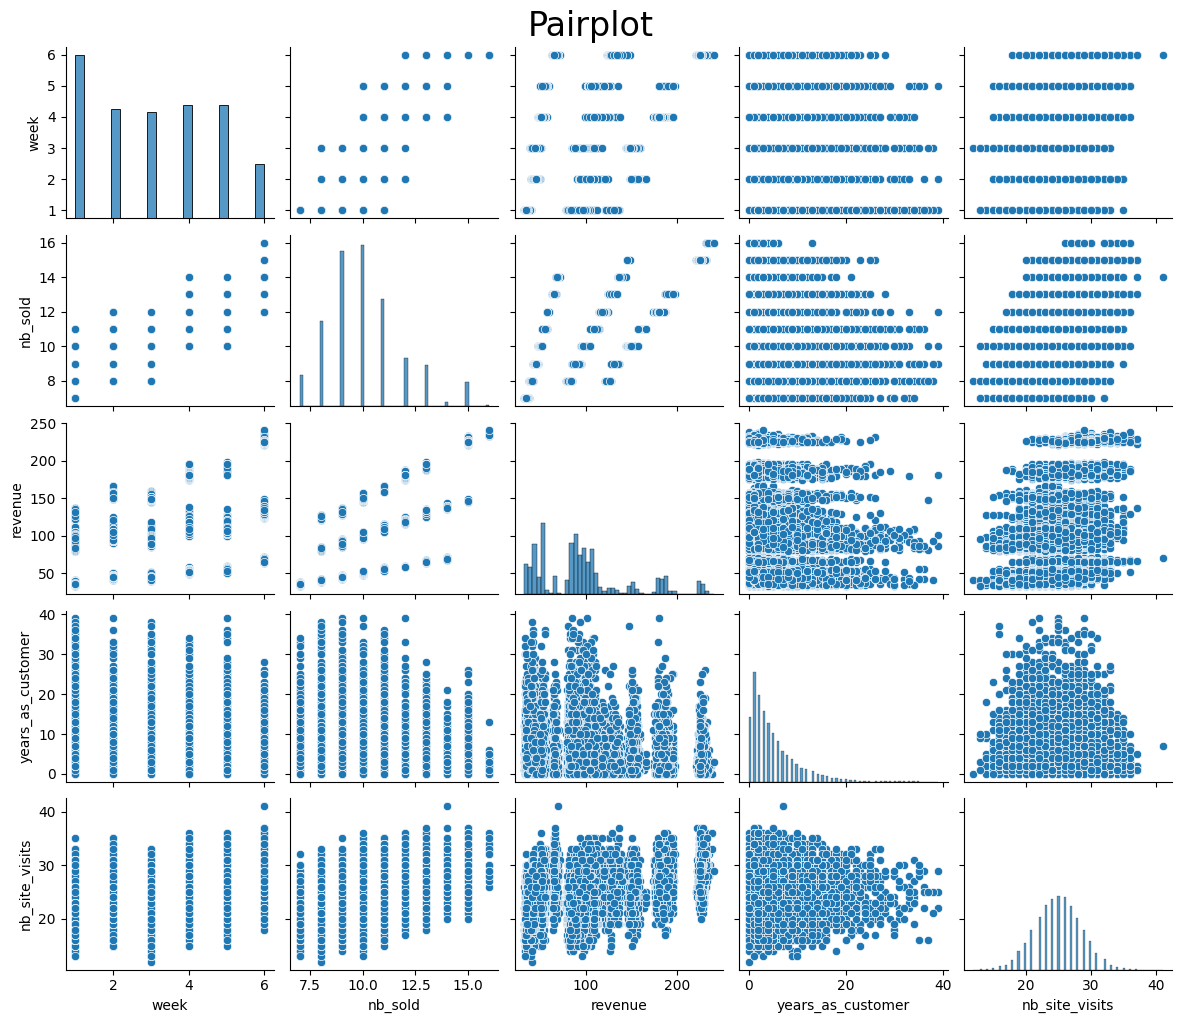

In [72]:
# Plot pairplot - all numerical data
g=sns.pairplot(data=df,height=2, aspect=1.2)
#g=sns.pairplot(data=df, hue='sales_method')
g.fig.suptitle('Pairplot',y=1.02,fontsize=24)
plt.show()
g.savefig("Pairplot.png",dpi=40)

In [ ]:
"""
fig, ax = plt.subplots(figsize=(7,5))
num_sold_sum = df.groupby(by='sales_method')['nb_sold'].sum().round(0)
vals = plt.bar(x=num_sold_sum.index, height=num_sold_sum, color=['tab:blue','tab:orange','tab:green'])

ax.bar_label(vals, label_type='edge', color='black',fontsize=10)
plt.ylabel('Number of Items Sold')
plt.title('Number of Items Sold by Sales Method')

#fig = ax.get_figure()
fig.savefig("Number_Sold_bySales.png", dpi=60)
plt.show()
"""

state
California        177004.26
Texas             114574.27
New York           90821.08
Florida            87128.93
Illinois           57691.53
Pennsylvania       57000.06
Ohio               53440.54
Michigan           48301.87
Georgia            47185.85
North Carolina     42133.76
Name: revenue, dtype: float64


C:\Users\AlexB\AppData\Local\Temp\ipykernel_61680\723225399.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(state_by_rev.index,rotation=45, ha='right')
C:\Users\AlexB\AppData\Local\Temp\ipykernel_61680\723225399.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(rev_by_vist.index,rotation=45, ha='right')


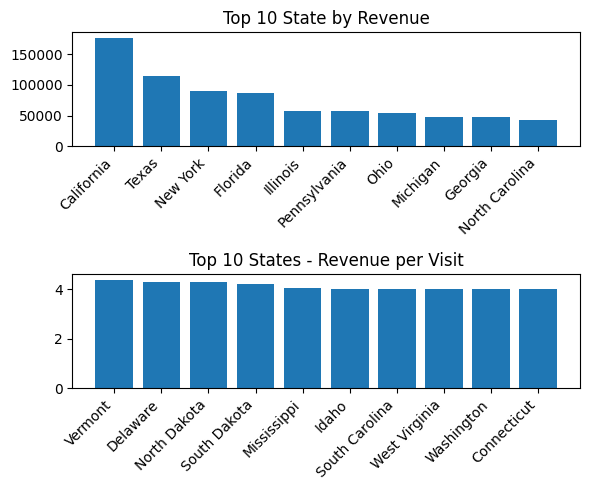

In [44]:
# Breakdown of revenue by state
state_by_rev = df.groupby(by='state')['revenue'].sum().round(2).sort_values(ascending=False)[:10]
print(state_by_rev)
state_by_visits = df.groupby(by='state')['nb_site_visits'].sum().round(0).sort_values(ascending=False)[:10]
state_by_years_cust = df.groupby(by='state')['years_as_customer'].mean().round(0).sort_values(ascending=True)[:10]

rev_by_vist = (df.groupby(by='state')['revenue'].sum().round(2)/ df.groupby(by='state')['nb_site_visits'].sum().round(0)).sort_values(ascending=False)[:10]

fig, ax = plt.subplots(2,1, figsize=(6,5))
ax[0].bar(x=state_by_rev.index,height=state_by_rev.values)
ax[0].set_xticklabels(state_by_rev.index,rotation=45, ha='right')
ax[0].set_title('Top 10 State by Revenue')
#
ax[1].bar(x=rev_by_vist.index,height=rev_by_vist.values)
ax[1].set_xticklabels(rev_by_vist.index,rotation=45, ha='right')
ax[1].set_title('Top 10 States - Revenue per Visit')

plt.tight_layout()
plt.show()
fig.savefig("Customer_State_Plot.png", dpi=60) 

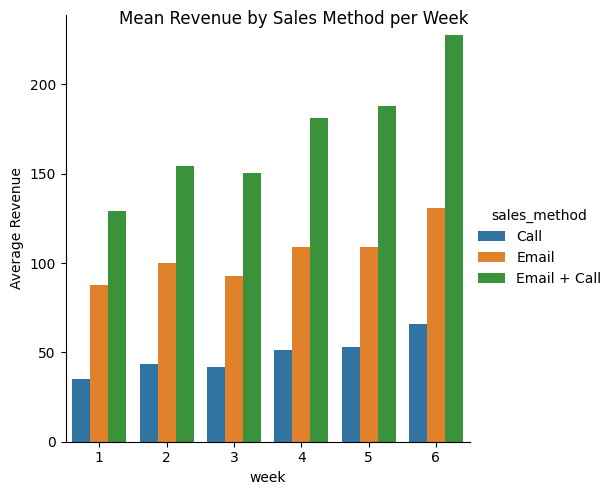

In [46]:
# Plot weekly average revenue by sales method
g=sns.catplot(data=df, x='week',y='revenue',hue='sales_method',kind='bar',ci=None)
g.fig.suptitle('Mean Revenue by Sales Method per Week')
g.set_ylabels('Average Revenue')
plt.show()
g.savefig("Mean_Revenue_bySales_perWeek.png", dpi=60) 
#print(dir(g))

In [138]:
revenue_week = df.groupby(by=['week'])['revenue'].sum().round(0)
print(revenue_week)


week
1    292295.0
2    214741.0
3    198525.0
4    258214.0
5    284063.0
6    187976.0
Name: revenue, dtype: float64


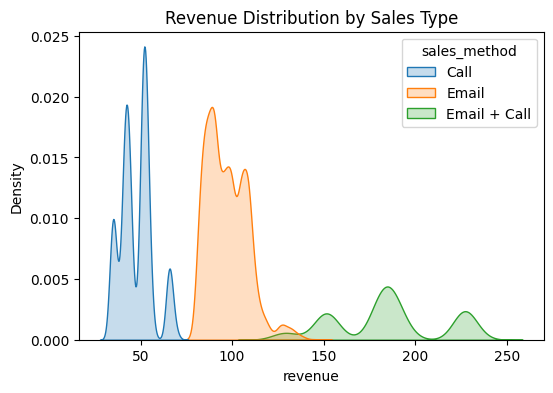

In [75]:
# Plot distribution of sales method
fig, ax = plt.subplots(figsize=(6,4))
g=sns.kdeplot(data=df, x='revenue',hue='sales_method',fill=True)
ax.set_title('Revenue Distribution by Sales Type')
fig.savefig("KDE_revenue_distribution.png",dpi=60) 
plt.show()

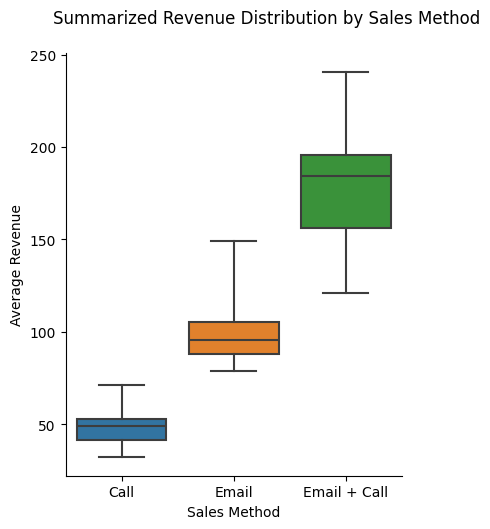

In [133]:
# Box plot by sales method
g = sns.catplot(data=df, x='sales_method',y=df['revenue'],kind='box',whis=[0,100],height=5,aspect=1.2)
g.fig.suptitle("Summarized Revenue Distribution by Sales Method", y=1.05, x=0.75, horizontalalignment='center')
g.set_xlabels('Sales Method')
g.set_ylabels('Average Revenue')
plt.show()
g.savefig("Revenue_by_sales_method_box.png") 